In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
cwd = os.getcwd()
sys.path.insert(0, cwd + "/..")

In [28]:
from koala.encoders import Encoder
encoder = Encoder("en")

In [3]:
from tqdm import tqdm

In [4]:
import pandas as pd
pd_x = pd.read_csv("resultados_cc.csv", sep=";")

In [10]:
pd_x["comentario"].values[1]

array(['La tele operadora muy bien, pero me pasó con incidencias informáticas y es un borde el teleoperador que me contestó, me trató como si fuera gilipollas, y terminé colgándole el teléfono para no seguir aguantándolo',
       '?llame para interesarme por una tarjeta que supuestamente me la mandaron el 26 de diciembre y a dia 31 no me ha llegado .y me contestan que debo de esperar todavia 7 dias mas ,hombre estando en madrid ,que tarde en llegarme mas de 12 dias desde que bloquee la anterior por perdida me parece un mal servicio,del banco ,lo expongo y me dicen que esque la tienen que fabricar  desde mi ignorancia me parece un camelo ,cuando el DNI te lo fabrican  en el mismo mo ento de la cita para la renovacion .perdonen pero no lo entiendo ....',
       '?llame para interesarme por una tarjeta que supuestamente me la mandaron el 26 de diciembre y a dia 31 no me ha llegado .y me contestan que debo de esperar todavia 7 dias mas ,hombre estando en madrid ,que tarde en llegarme mas d

# Clasificación de tipo de comentario

In [21]:
num_labels = 40

In [22]:
pd_x.sample(num_labels).to_csv("resultados_cc_sample.csv", sep=";")

In [87]:
pd_sample_labelled = pd.read_csv("resultados_cc_sample.csv", sep=";")

0: comentario sobre el problema
1: comentario sobre la llamada
2: ambos
3: otros

In [88]:
pd_sample_labelled

,Unnamed: 0,id,date,Tipo Comentario,comentario,NPS score,NPS nivel,canales mencionados,mención canal digital,mención canal telefónico,mención canal físico,relevancia,problema producto,problema canal,problema servicio
0,14289.0,115902122,30/10/2020,1,la persona que me atendió a pesar de que era u...,10,PROMOTOR,[],FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO
1,13136.0,113119156,30/09/2020,0,ustedes me han puesto un correo en el que me d...,3,DETRACTOR,[],FALSO,FALSO,FALSO,VERDADERO,VERDADERO,FALSO,FALSO
2,15453.0,119407745,08/12/2020,1,Que me puedan ayudar a resolver el problema qu...,0,DETRACTOR,[],FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO
3,11568.0,110052645,18/08/2020,1,Les doy un 1 por q espere en la línea 15 minut...,1,DETRACTOR,[],FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO
4,12688.0,112165646,18/09/2020,0,Que tengas que pagar 20? por un certificado qu...,0,DETRACTOR,['app'],VERDADERO,FALSO,FALSO,VERDADERO,FALSO,VERDADERO,FALSO
5,3812.0,97972524,25/03/2020,1,"Atenció rebuda sempre es eficient, resolutiva,...",10,PROMOTOR,[],FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO
6,11314.0,109707785,11/08/2020,2,(Ver comentario de la siguiente pregunta) Por ...,5,DETRACTOR,[],FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,VERDADERO
7,1870.0,94414813,11/02/2020,3,Ens heu bloquejat el compte per falta dactuali...,1,DETRACTOR,[],FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO
8,9173.0,106876096,04/07/2020,1,"La persona que me ha atendido ( María José) , ...",10,PROMOTOR,[],FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO
9,11071.0,109389788,06/08/2020,1,Estuve unos minutos a la espera hasta ser aten...,8,NEUTRO,[],FALSO,FALSO,FALSO,VERDADERO,FALSO,FALSO,FALSO


In [89]:
from koala.utils import convert_to_samples
train_samples = convert_to_samples(pd_sample_labelled.T.to_dict().values(), "comentario", "Tipo Comentario")

In [92]:
from tqdm import tqdm
for i in tqdm(range(len(train_samples))):
    s = train_samples[i]
    s.encode(encoder, keep_vector=True)
    train_samples[i] = s

100%|██████████| 46/46 [00:01<00:00, 31.42it/s]


In [93]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca = pca.fit([x.vector for x in train_samples])

In [94]:
reduced_vectors = pca.transform([x.vector for x in train_samples])

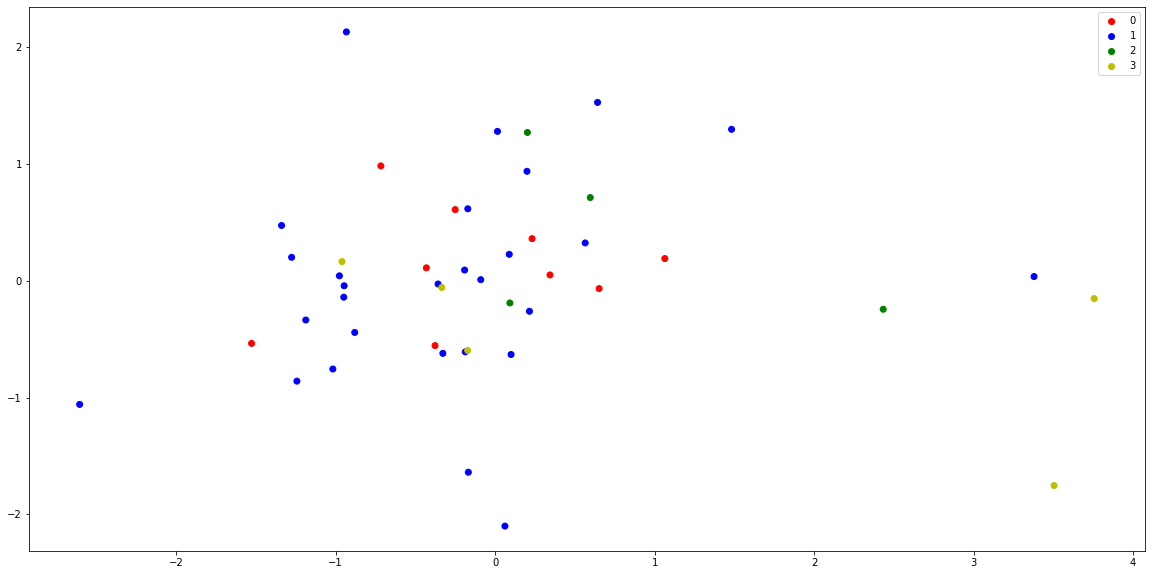

In [95]:
import matplotlib.pyplot as plt
labels = list(range(4))
plt.figure(figsize=(20, 10))
colors = ["r", "b", "g", "y"]
for l in labels:
    vectors_to_plot = [reduced_vectors[i] for i in range(len(train_samples)) if train_samples[i].label == l]
    plt.scatter(*zip(*vectors_to_plot), c=[colors[list(labels).index(l)]] * len(vectors_to_plot))
plt.legend(labels);

In [96]:
from koala.utils import split_samples_per_label
train_data_per_label = split_samples_per_label(train_samples)

In [97]:
for k, v in train_data_per_label.items():
    for i in tqdm(range(len(v)), desc="Encoding label " + str(k)):
        v[i].encode(encoder, keep_vector=True)
    train_data_per_label[k] = v

Encoding label 3: 100%|██████████| 5/5 [00:00<00:00, 10106.76it/s]


In [99]:

dict_vectors_per_label = {k: [x.vector for x in v] for k, v in train_data_per_label.items()}

In [100]:
for k, v in dict_vectors_per_label.items():
    print("Samples for ", k, ": ", len(v))

Samples for  1 :  28
Samples for  0 :  9
Samples for  2 :  4
Samples for  3 :  5


In [101]:
from koala.classifier import DistanceToAverageClassifier
distance_classifier = DistanceToAverageClassifier("cosine", True)
distance_classifier.fit(dict_vectors_per_label)

In [102]:
from koala.abstracts import Sample
for _ in range(30):
    i = random.choice(range(10000))
    c = pd_x["comentario"][i]

    print(c)
    s = Sample(text=c, label=None)
    v = s.encode(encoder)
    
    print(distance_classifier.classify_vector(v))
    print("=============================")

He sido bien atendido y la llamada ha sido bien derivada, lo único que no me ha gustado ha sido el tiempo de espera
{0: 0.29244055538621794, 1: 0.6831516374738302, 2: 0.0, 3: 0.024407807139951786}
Ahora mismo paso una situación incomoda con el banco, ya que no puedo revisar mis movimientos porq me encuentro unos meses fuera del país y no tengo acceso a la clave que me envían a mi número de móvil registrado en el banco. Por lo tanto no he podido abrir mi app y soy ajena a todos mis movimientos. Y me es un poco difícil estar llamando para q me informen de mis movimientos.
{0: 0.6723191, 1: 0.14212821, 2: 0.11335571, 3: 0.072196975}
La verdad es que me resuelven las dudas y me ayudan a gestionar el problema sin necesidad de acudir a una oficina
{0: 0.1673495554832483, 1: 0.685395620714962, 2: 0.14725482380178975, 3: 0.0}
He solicitado por teléfono q me faciliten, para la declaración de la renta, la cuantía de mi préstamo. La parte q corresponde a intereses, y la parte del capital amortiza

In [5]:
pd_x = pd_x[pd_x["mención canal físico"] == "VERDADERO"]

In [81]:
pd_x.columns

Index(['id', 'date', 'comentario', 'NPS score', 'NPS nivel',
       'canales mencionados', 'mención canal digital',
       'mención canal telefónico', 'mención canal físico', 'relevancia',
       'problema producto', 'problema canal', 'problema servicio', 'problema',
       'canal_sugerido', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17',
       'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21',
       'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'],
      dtype='object')

In [104]:
comments = pd_x["comentario"].values
labels = pd_x["canal_sugerido"].fillna("ninguno").values
unique_labels= set(labels)

In [106]:
dict_labels = {'CAJERO': "cajero",
 'Caja': "cajero",
 'Cajero': "cajero",
 'OFICINA': "oficina",
 'Oficial': "oficina",
 'Oficina': "oficina",
 'Oficinas': "oficina",
 'app': "app",
 'caja': "oficina",
 'cajero': "cajero",
 'cajeros': "cajero",
 'l"oficina': "oficina",
 'llamadas': "teléfono",
 "ninguno": "ninguno",
 'oficina': "oficina",
 'oficinas': "oficina",
 'teléfono': "teléfono",
 'web': "web"}
labels = [dict_labels[l] for l in labels]
unique_labels= set(labels)
unique_labels

{'app', 'cajero', 'ninguno', 'oficina', 'teléfono', 'web'}

In [85]:
from koala.encoders import Encoder

In [86]:
encoder = Encoder("es")

In [109]:
encoded_texts = [encoder.encode(t) for t in tqdm(comments[:1800], position=0, leave=True)]

100%|██████████| 1800/1800 [01:50<00:00, 16.27it/s]


# Visualization

In [110]:
from sklearn.decomposition import PCA
pca = PCA(2)
pca = pca.fit(encoded_texts)
print("Explained variance:", sum(pca.explained_variance_ratio_))

Explained variance: 0.27789778848879426


In [111]:
reduced_vectors = pca.transform(encoded_texts)

In [114]:
reduced_vectors.shape

(1800, 2)

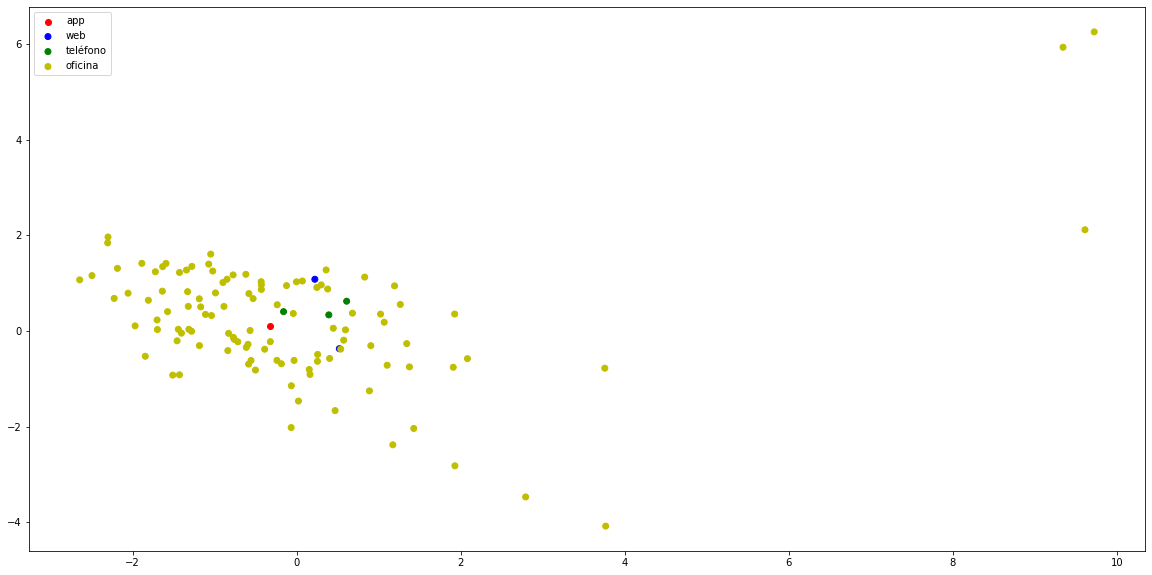

In [116]:
plt.figure(figsize=(20, 10))
colors = ["r", "b", "g", "y"]
legends = []
for l in unique_labels:
    try:
        vectors_to_plot = [reduced_vectors[i] for i in range(len(reduced_vectors)) if labels[i] == l]
        plt.scatter(*zip(*vectors_to_plot), c=[colors[list(unique_labels).index(l)]] * len(vectors_to_plot))
        legends.append(l)
    except:
        pass
plt.legend(legends);

## Dim reduction

In [56]:
pca = PCA(70)
pca = pca.fit(encoded_texts)
print("Explained variance:", sum(pca.explained_variance_ratio_))

Explained variance: 0.8472707108533615
